1. Analyze
2. Preprocess data 
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

- User demographic information
- Browsing behavior
- Historical purchase data among other information

It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

<div align='left'>
    <h1 style="color: #FFA500; font-size: 36px; font-weight: bold;">[HW05] INTRODUCTION TO MACHINE LEARNING</h1>
</div>

> **Sinh viên:** Nguyễn Công Hoài Nam  
> **Mã số sinh viên:** 21280099

## **Load Dataset**

Import libraries

In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Phát hiện gian lận thẻ tín dụng**
- `ID` ID của khách hàng.

- `GENDER` Giới tính của khách hàng (M/F).

- `CAR` Khách hàng có sở hữu ô tô hay không (Y/N).

- `REALITY` Khách hàng có sở hữu tài sản hay không (bất động sản, nhà cửa)  (Y/N).

- `NO_OF_CHILD` Số lượng con cái của khách hàng.
0
- `INCOME` Thu nhập của khách hàng.

- `INCOME_TYPE` Loại thu nhập của khách hàng (ví dụ: Working, Commercial associate).

- `EDUCATION_TYPE` Trình độ học vấn của khách hàng (ví dụ: Secondary / secondary special).

- `FAMILY_TYPE` Tình trạng hôn nhân của khách hàng (ví dụ: Married, Single / not married).

- `HOUSE_TYPE` Loại nhà ở của khách hàng (ví dụ: House / apartment).

- `FLAG_MOBIL` Khách hàng có điện thoại di động hay không (hầu hết giá trị là 1).

- `WORK_PHONE` Khách hàng có điện thoại công việc hay không (0/1).

- `PHONE` Khách hàng có số điện thoại cố định hay không (0/1).

- `E_MAIL` Khách hàng có email hay không (0/1).

- `FAMILY SIZE` Số lượng thành viên trong gia đình

- `BEGIN_MONTH` Số tháng kể từ khi khách hàng bắt đầu sử dụng dịch vụ.

- `AGE` Tuổi của khách hàng.

- `YEARS_EMPLOYED` Số năm khách hàng đã làm việc.

- `TARGET` 0: không gian lận, 1: gian lận 

In [566]:
import pandas as pd
PATH = "D:\\Courses HK2 23-24\\Machine Learning\\LAB\\Week 05\\Homework\\credit_fraud.csv" 

df = pd.read_csv(PATH)
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,5008806,5008808,5008809,5008810,5008811
GENDER,M,F,F,F,F
CAR,Y,N,N,N,N
REALITY,Y,Y,Y,Y,Y
NO_OF_CHILD,0,0,0,0,0
INCOME,112500.0,270000.0,270000.0,270000.0,270000.0
INCOME_TYPE,Working,Commercial associate,Commercial associate,Commercial associate,Commercial associate
EDUCATION_TYPE,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
FAMILY_TYPE,Married,Single / not married,Single / not married,Single / not married,Single / not married


## **Data Analysis**

### Check some info

In [567]:
# Missing values
df.isnull().sum()


Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [568]:
# Duplicated 
df.duplicated().sum()

0

- Dataset không có missing data và dữ liệu lặp

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

- Dataset có cả biến liên tục và phân loại

Một số thông số của dataset

In [570]:
df.describe()

,Unnamed: 0,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,12566.500000,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,7255.705169,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,6283.250000,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,12566.500000,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,18849.750000,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,25133.000000,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


In [571]:
df.describe(include="O")

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
count,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,15630,14618,16461,15622,16808,17509,22102


### Data Visualization 

In [572]:
dataset = df.copy()

In [573]:
PALETTE = "PuBuGn"
COLOR = (2/255, 129/255, 138/255)
COLOR_2 = (243/255,182/255,63/255) 

Histogram plot

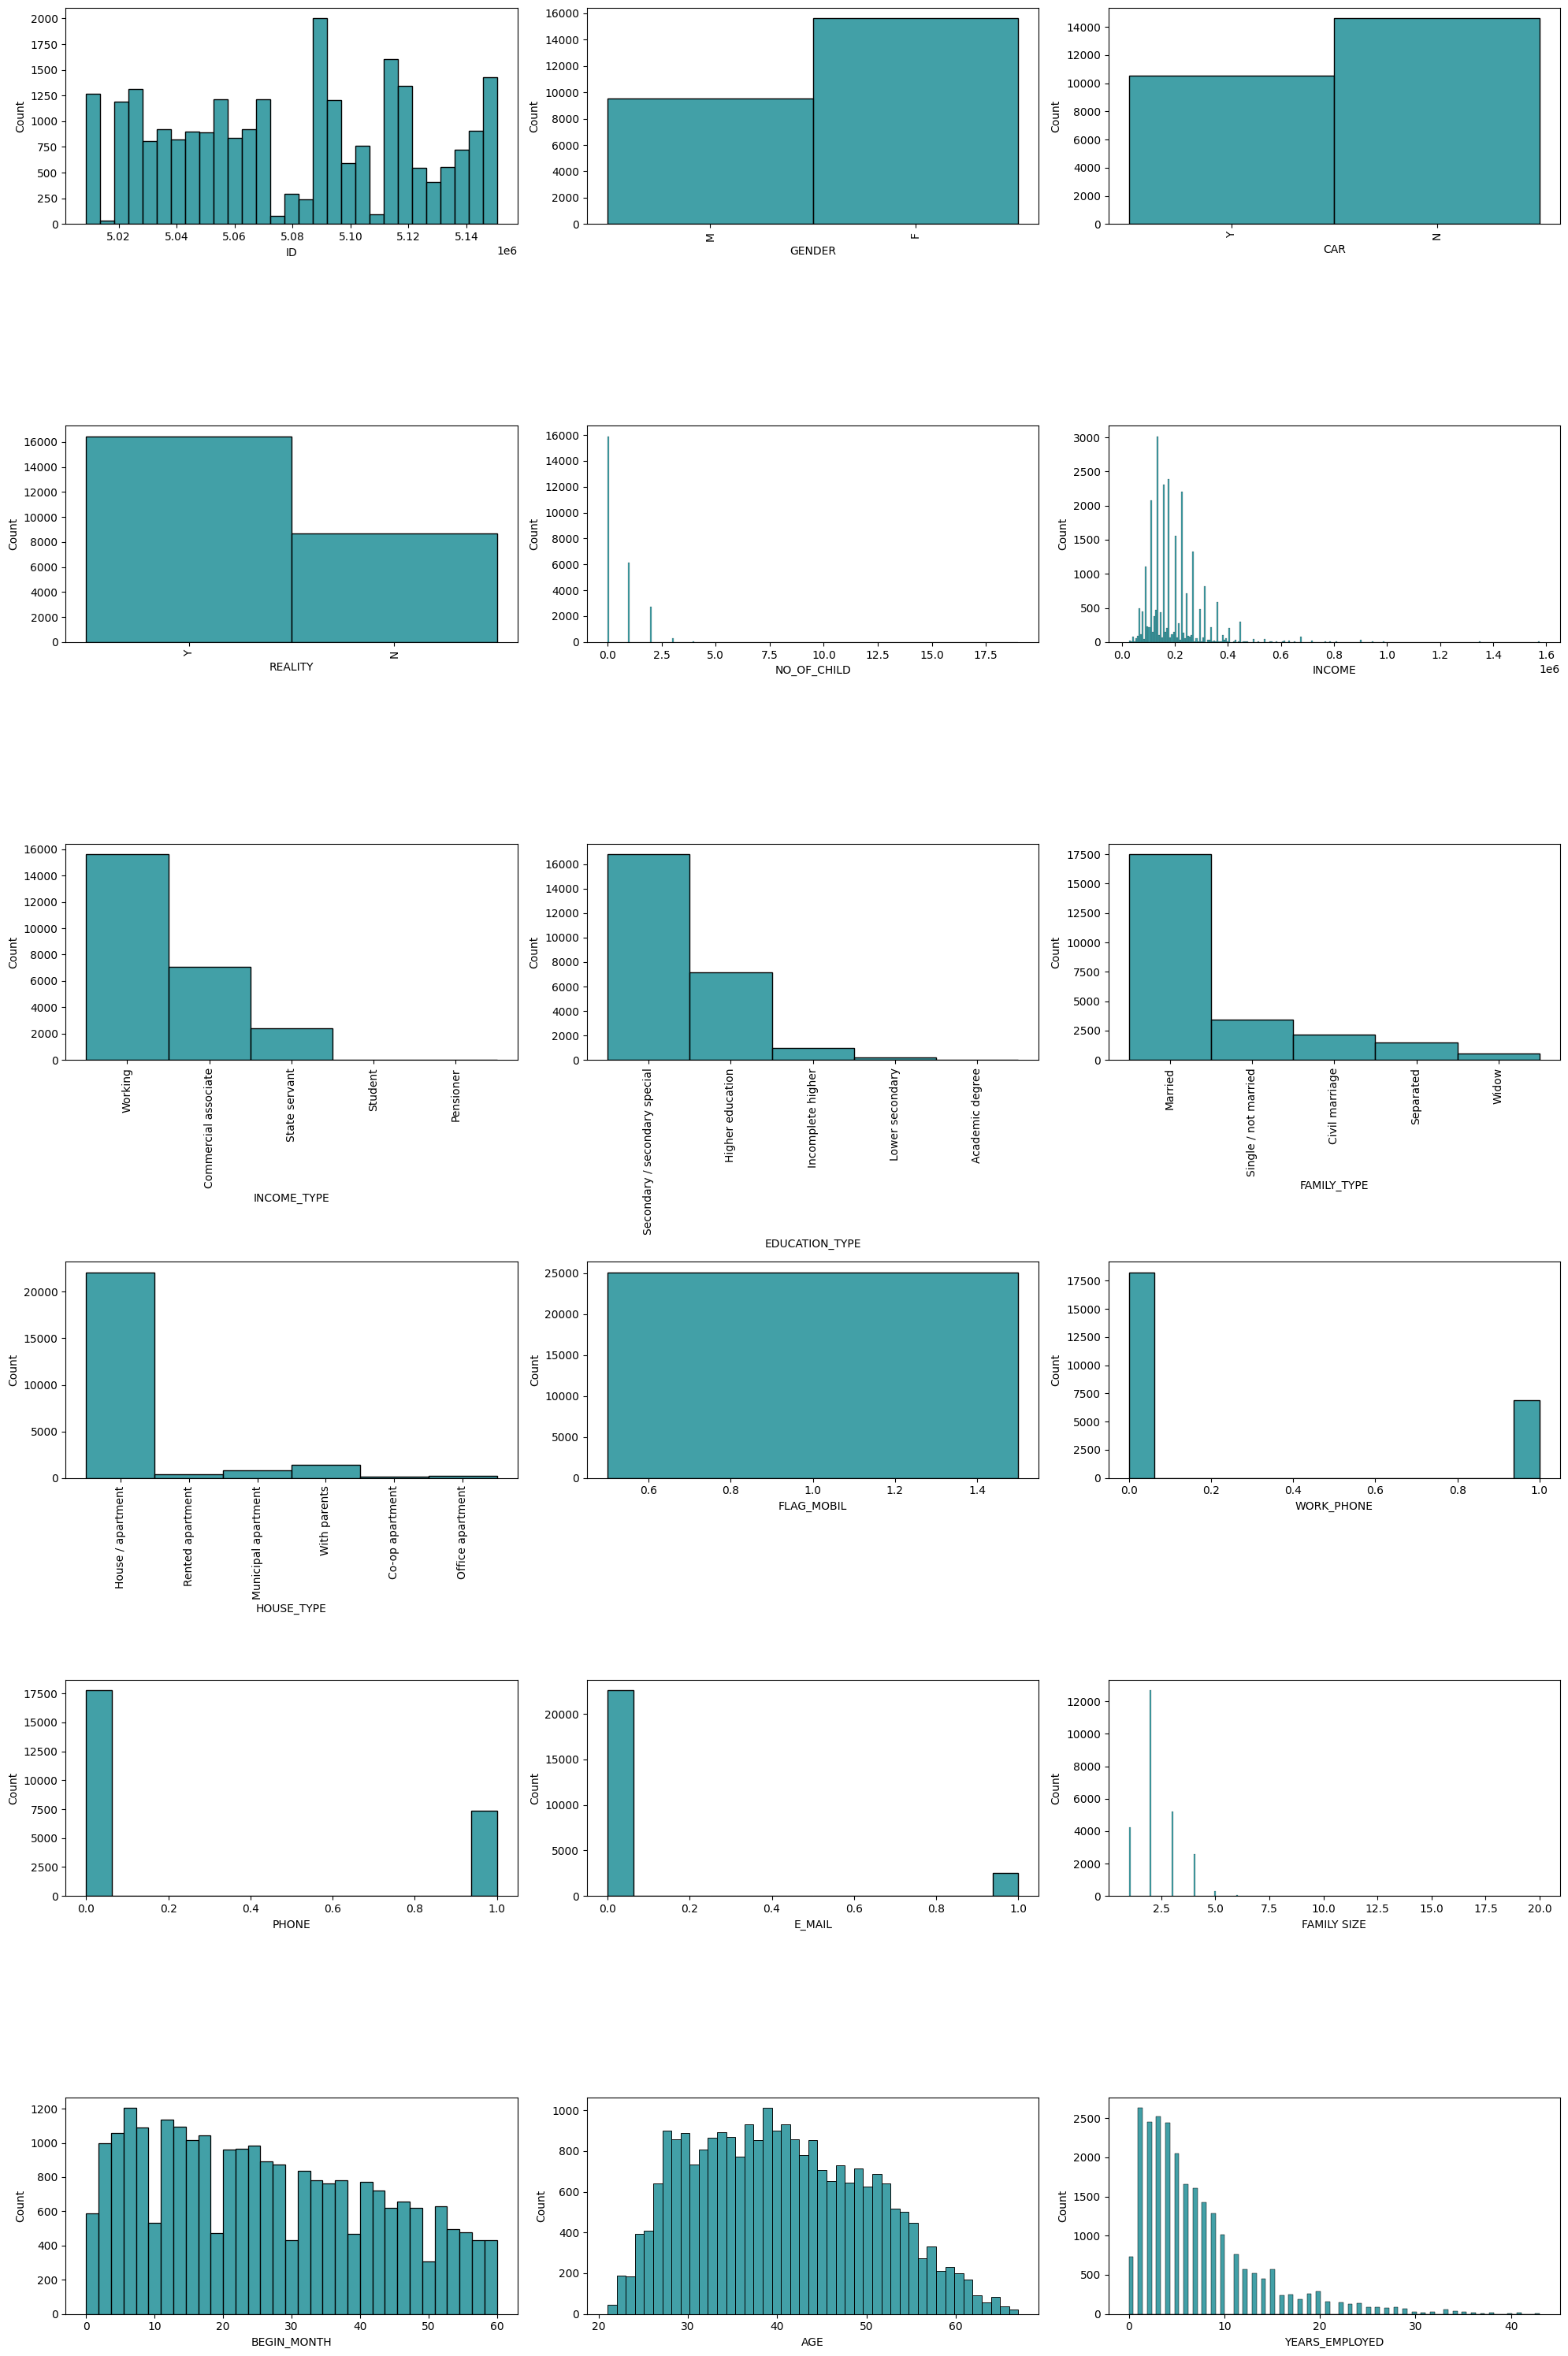

In [574]:
col_names = df.columns[1:-1]
fig = plt.figure(figsize=(20, 30))

for i, v in enumerate(col_names):
    axes = fig.add_subplot(6, 3, i+1)
    if dataset[v].dtype == 'object': 
        sns.histplot(dataset[v], ax=axes, color = COLOR)
        axes.tick_params(axis='x', labelrotation=90) 
    else:
        sns.histplot(dataset[v], ax=axes, color = COLOR)

plt.tight_layout()
plt.show()

- Phân phối dữ liệu không đồng đều, đa số lệch trái
- Cột `FLAG_MOBIL` tất cả đều bằng 1 => không có giá trị, ta sẽ loại bỏ nó


TARGET

Number of Frauds: 422
Number of Not Frauds: 24712


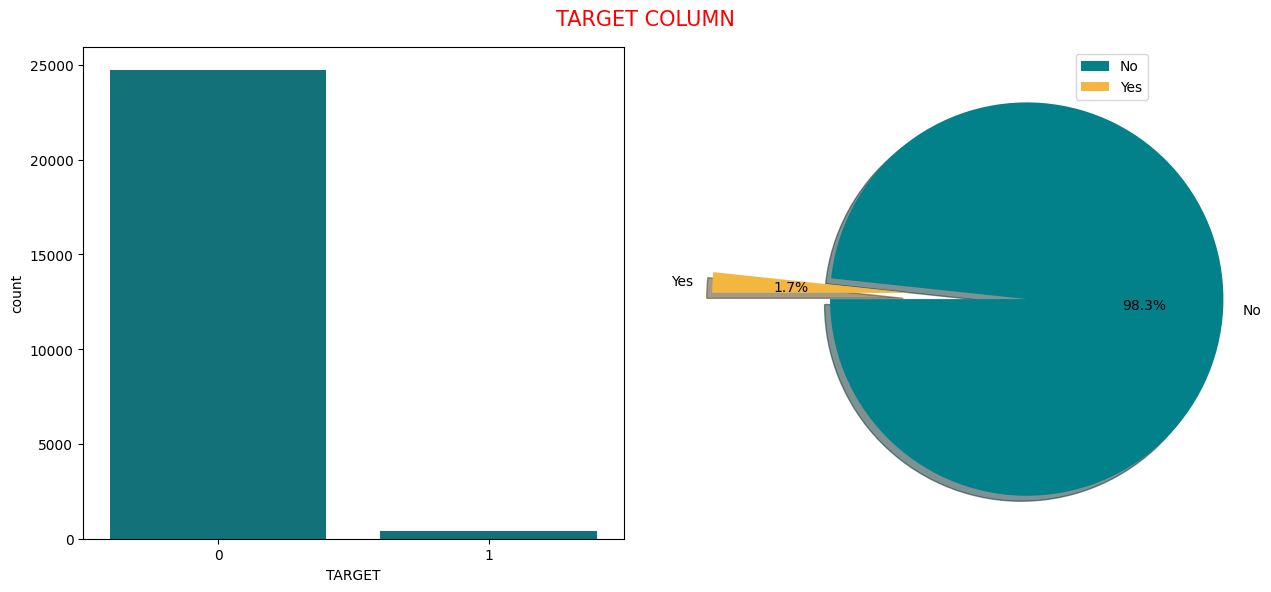

In [575]:
plt.figure(figsize=(13, 6))

plt.suptitle("TARGET COLUMN", fontsize=15, color="Red")

# Biểu đồ countplot
plt.subplot(121)
sns.countplot(data=dataset, x="TARGET", color = COLOR)

# Biểu đồ boxplot

plt.subplot(122)
labels = ['No','Yes']
data = dataset['TARGET'].value_counts(sort=True)
explode = (0.6,0)
plt.pie(data,shadow =True,startangle=180
        ,autopct="%1.1f%%",explode=explode,labels=labels,colors=[COLOR,COLOR_2])
plt.tight_layout()
plt.legend()
print(f"Number of Frauds: {data[1]}")
print(f"Number of Not Frauds: {data[0]}")


# plt.tight_layout()
plt.show()

- Chỉ 1,7% dữ liệu được gán là gian lận (fraud), trong khi số còn lại là không gian lận (gần 25k sample)
- Đây là một bộ dữ liệu không cần bằng khi hai nhãn của TARGET quá lệch nhau


GENDER

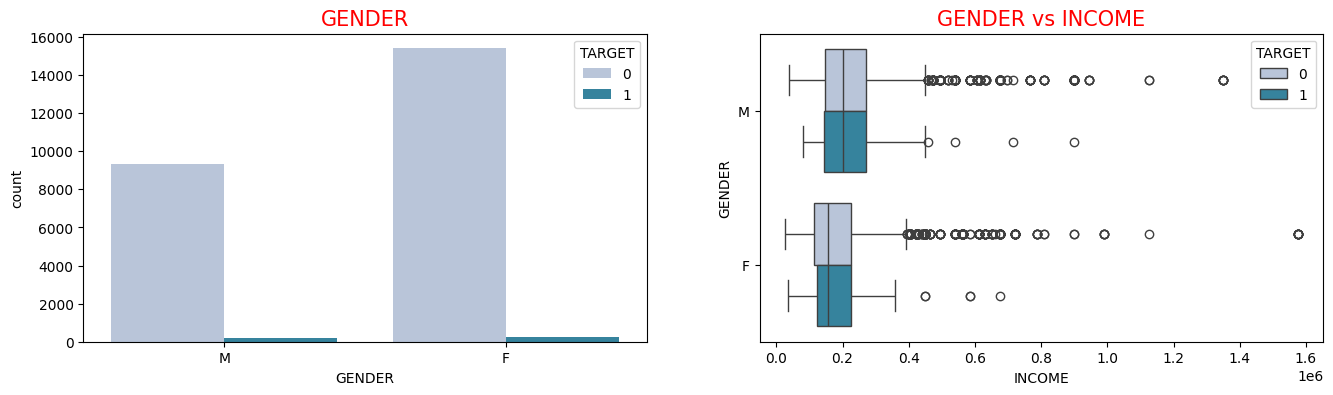

In [576]:
plt.figure(figsize=(16, 4))

# Biểu đồ countplot
plt.subplot(121)
sns.countplot(data=dataset, x="GENDER", hue="TARGET", palette=PALETTE)
plt.title("GENDER", fontsize=15, color="Red")

# Biểu đồ boxplot
plt.subplot(122)
sns.boxplot(data=dataset, x="INCOME", y="GENDER", hue="TARGET", palette=PALETTE)
plt.title("GENDER vs INCOME", fontsize=15, color="Red")

plt.show()

- Số lượng khách hàng nữ chiếm phần đa trong dataset

- Nhưng mức thu nhập trung bình của khách hàng nam có phần nhỉnh hơn

CAR

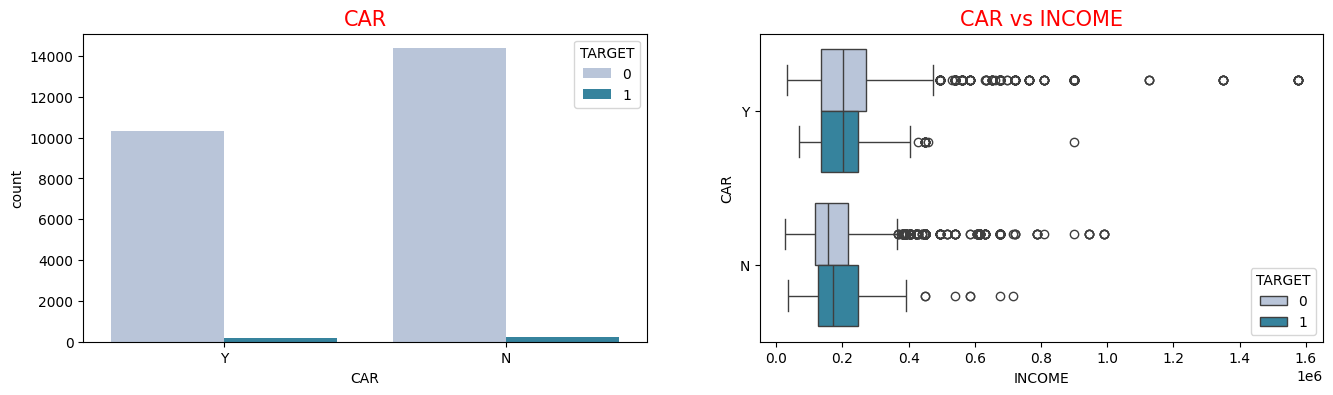

In [577]:
plt.figure(figsize=(16, 4))

# Biểu đồ countplot
plt.subplot(121)
sns.countplot(data=dataset, x="CAR", hue="TARGET", palette=PALETTE)
plt.title("CAR", fontsize=15, color="Red")

# Biểu đồ boxplot
plt.subplot(122)
sns.boxplot(data=dataset, x="INCOME", y="CAR", hue="TARGET", palette=PALETTE)
plt.title("CAR vs INCOME", fontsize=15, color="Red")

plt.show()

- Số khách hàng không có xe hơi chiếm nhiều hơn
- Đa số khách hàng có xe hơi có thu nhập cao hơn

REALITY

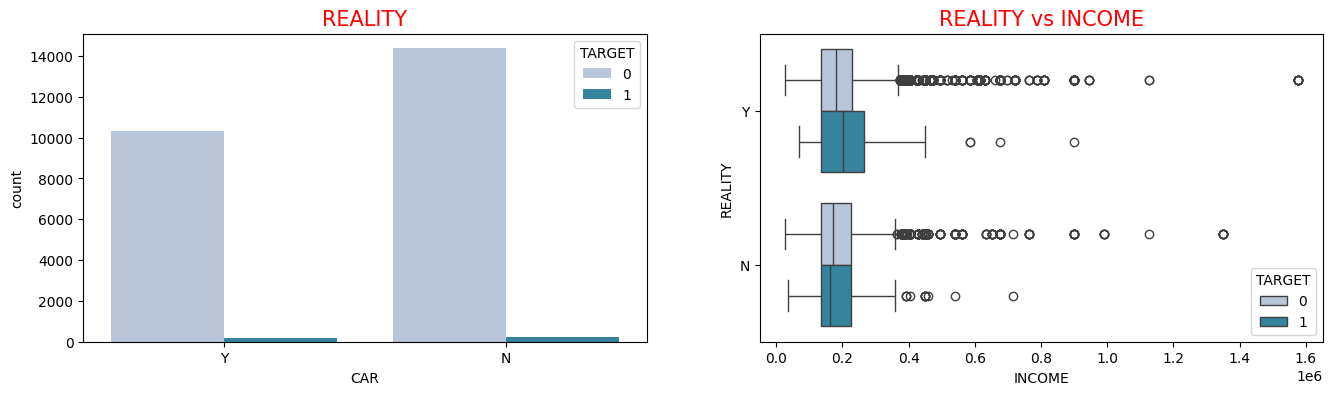

In [578]:
plt.figure(figsize=(16, 4))

# Biểu đồ countplot
plt.subplot(121)
sns.countplot(data=dataset, x="CAR", hue="TARGET", palette=PALETTE)
plt.title("REALITY", fontsize=15, color="Red")

# Biểu đồ boxplot
plt.subplot(122)
sns.boxplot(data=dataset, x="INCOME", y="REALITY", hue="TARGET", palette=PALETTE)
plt.title("REALITY vs INCOME", fontsize=15, color="Red")

plt.show()

- Số khách hàng không có tài sản giá trị chiếm nhiều hơn
- Không có sự chênh lệch đáng kể ở mức thu nhập

INCOME

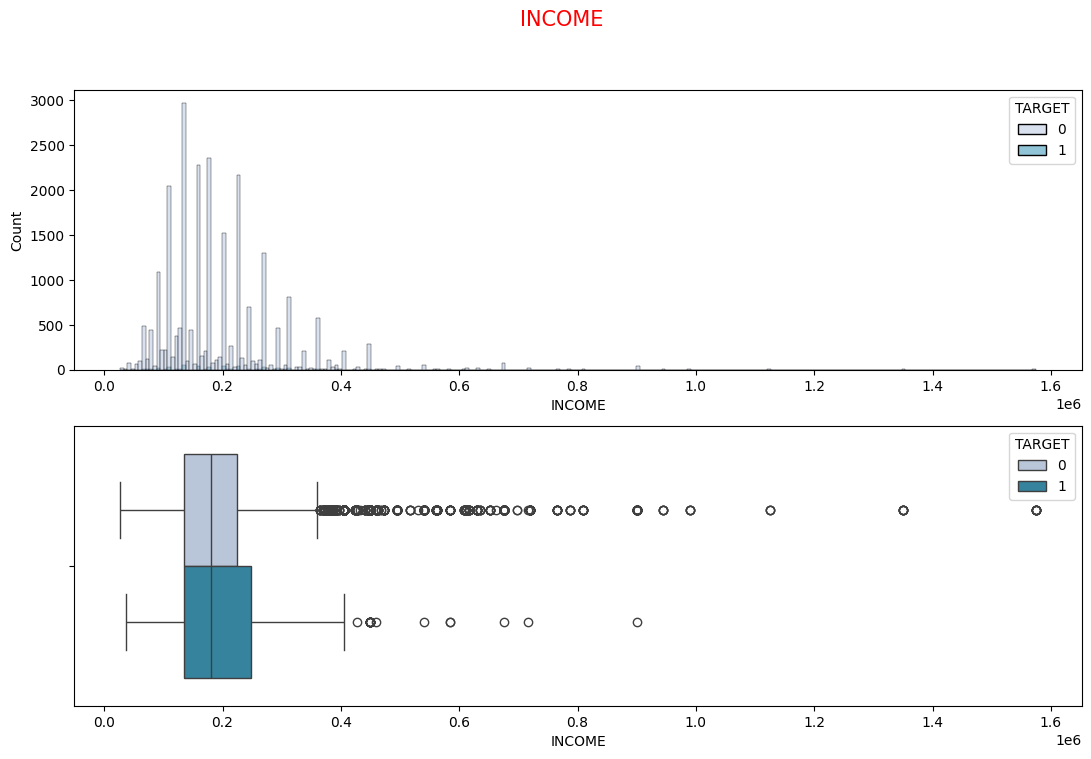

In [579]:
plt.figure(figsize=(13,8))
plt.suptitle("INCOME", fontsize=15, color="Red")
plt.subplot(211)
sns.histplot(data = dataset, x = dataset["INCOME"], hue = "TARGET", palette=PALETTE)
plt.subplot(212)
sns.boxplot(data=dataset, x="INCOME",hue="TARGET",palette=PALETTE)
plt.show()

- Hầu hết khách hàng có thu nhập trong khoảng $(0.03*10^6,0.4*10^6)$
- Ta thấy có một số outliers mà ta sẽ xử lý sau

INCOME_TYPE

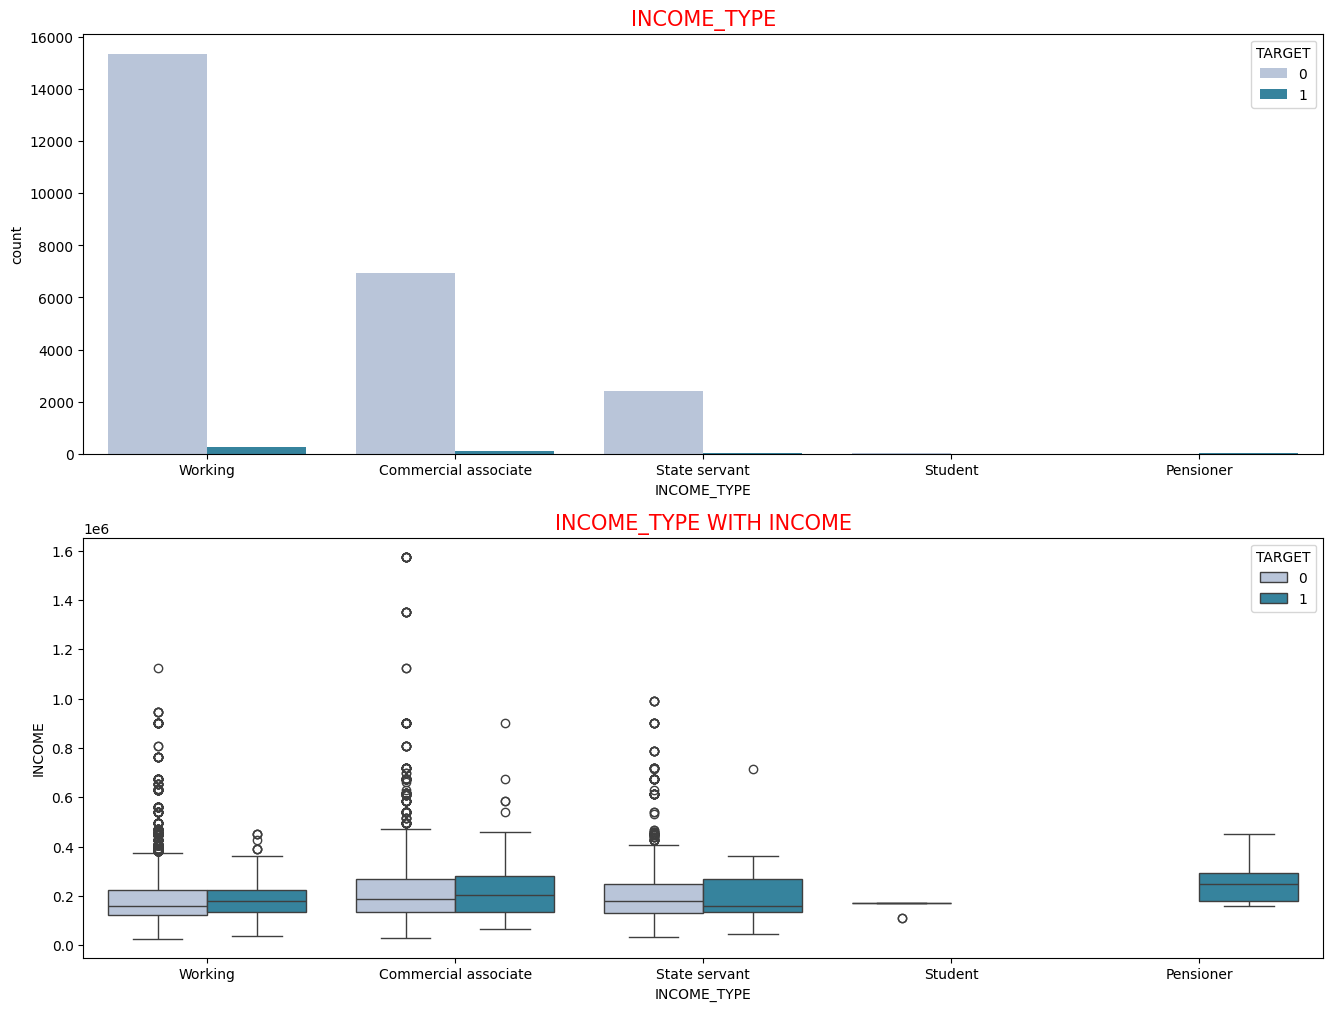

In [580]:
plt.figure(figsize=(16,12))
plt.subplot(211)
plt.title("INCOME_TYPE", fontsize=15, color="Red")

sns.countplot(data=dataset, x = dataset["INCOME_TYPE"],hue="TARGET",palette=PALETTE)
plt.subplot(212)
plt.title("INCOME_TYPE WITH INCOME", fontsize=15, color="Red")
sns.boxplot(data=dataset, x="INCOME_TYPE",y="INCOME",hue="TARGET",palette=PALETTE)
plt.show()

- Phần lớn khách hàng là nhân viên lao động, cộng tác viên thương mại và công chức nhà nước
- Nhân viên lao động chiếm phần đa trong số lượng khách hàng gian lận (tất nhiên nó cũng bị ảnh hưởng bởi số lượng khách hàng gian lận là quá ít)

EDUCATION_TYPE

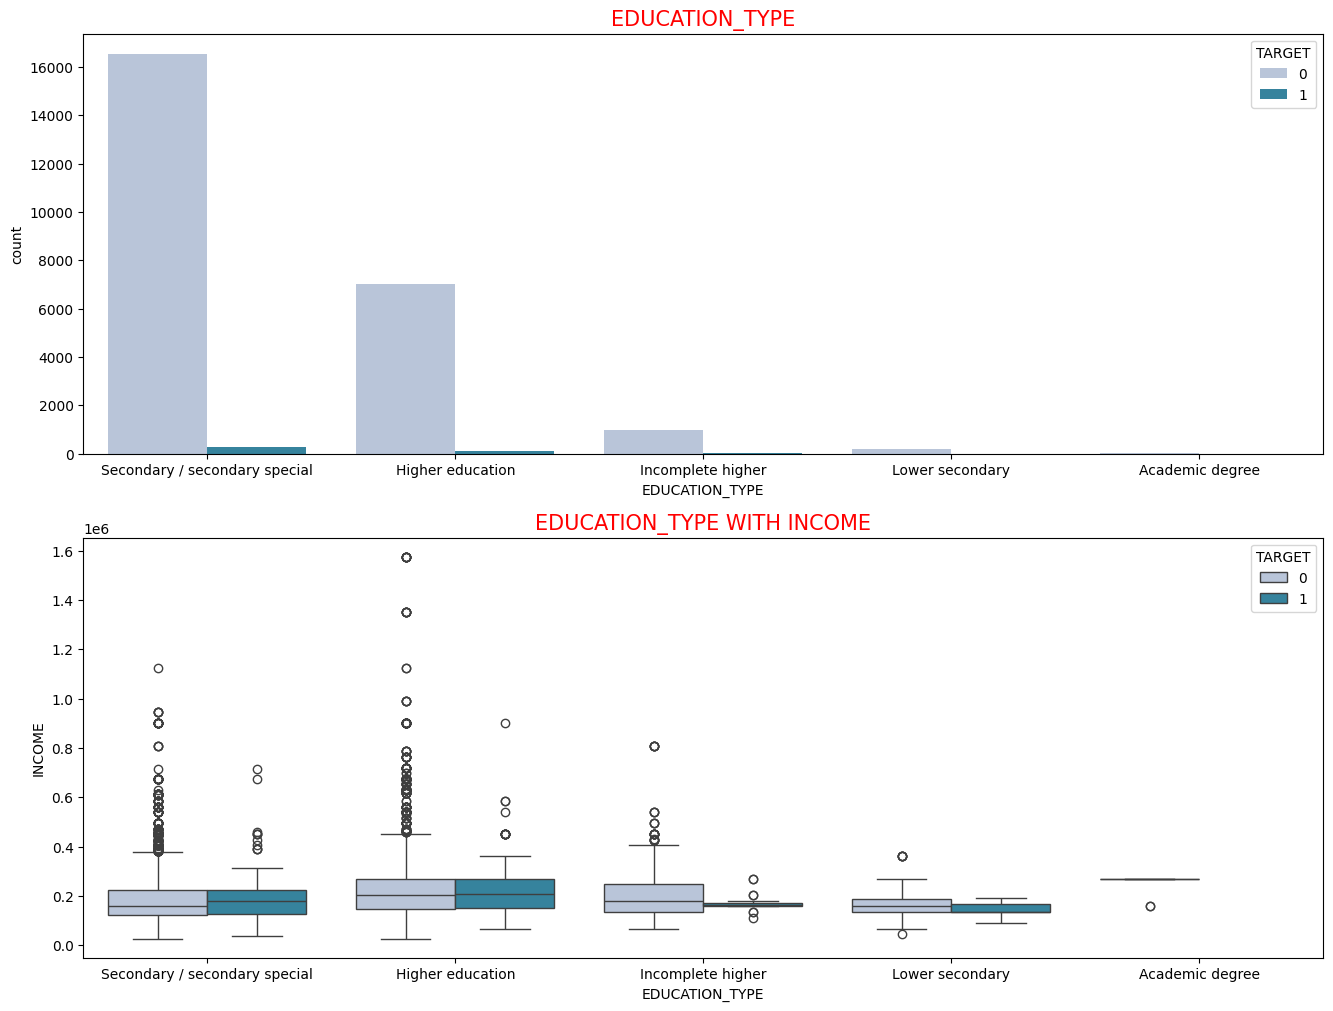

In [581]:
plt.figure(figsize=(16,12))
plt.subplot(211)
plt.title("EDUCATION_TYPE", fontsize=15, color="Red")

sns.countplot(data=dataset, x = dataset["EDUCATION_TYPE"],hue="TARGET",palette=PALETTE)
plt.subplot(212)
plt.title("EDUCATION_TYPE WITH INCOME", fontsize=15, color="Red")
sns.boxplot(data=dataset, x="EDUCATION_TYPE",y="INCOME",hue="TARGET",palette=PALETTE)
plt.show()

- Khách hàng có bậc giáo dục là: secondary/secondary special, higher và imcomplete higher chiếm phần đa
- Những khách hàng là secondary/secondary special có số lượng gian lận nhiều nhất
- Bậc higher education có mức lương nhỉnh nhất

FAMILY_TYPE

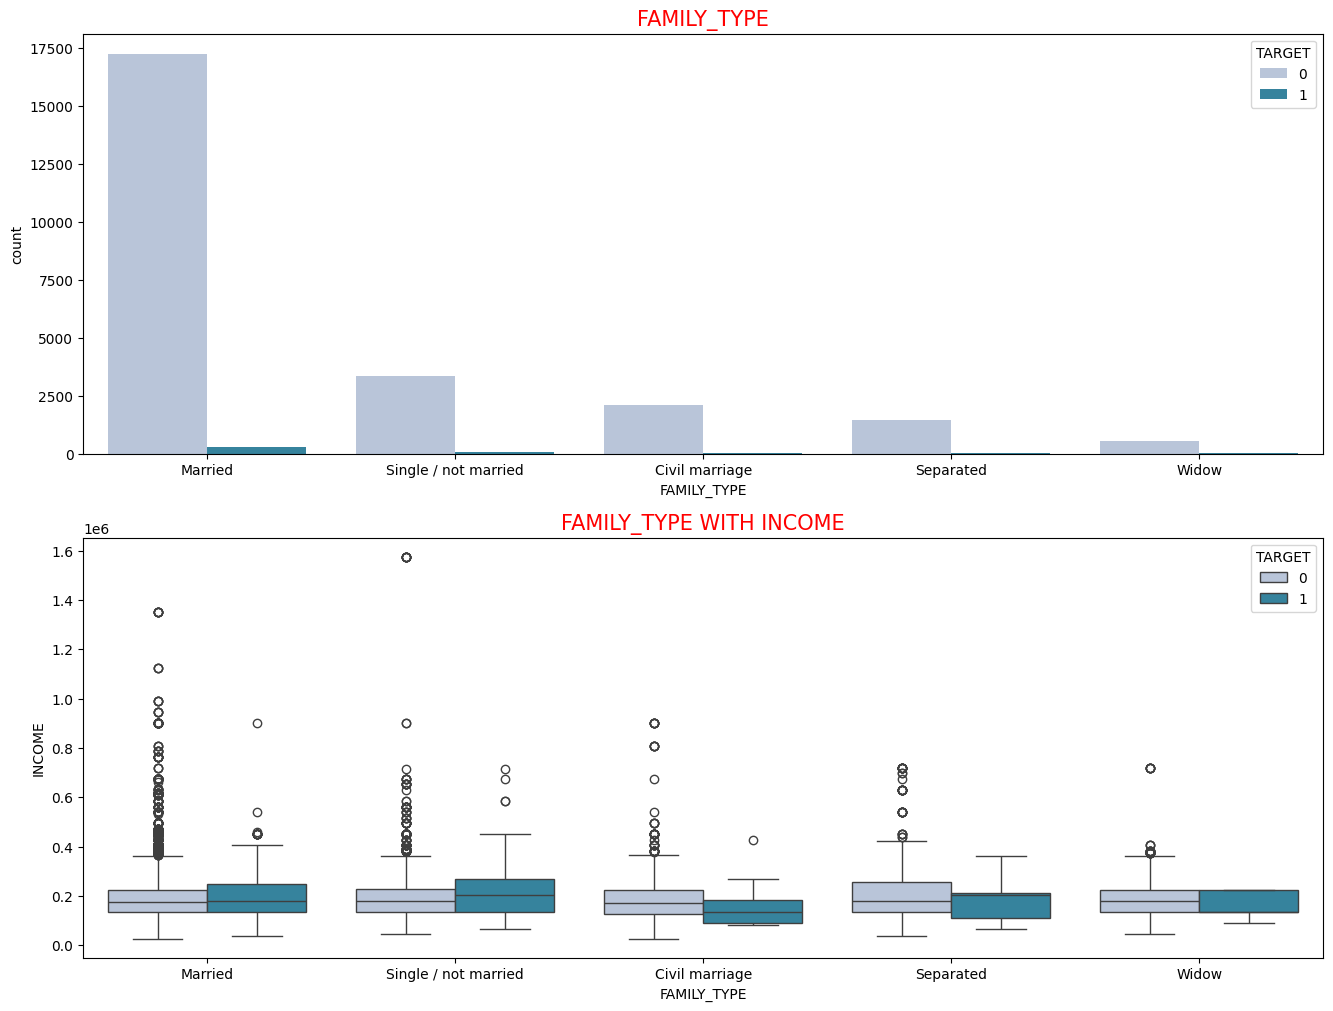

In [582]:
plt.figure(figsize=(16,12))
plt.subplot(211)
plt.title("FAMILY_TYPE", fontsize=15, color="Red")

sns.countplot(data=dataset, x = dataset["FAMILY_TYPE"],hue="TARGET",palette=PALETTE)
plt.subplot(212)
plt.title("FAMILY_TYPE WITH INCOME", fontsize=15, color="Red")
sns.boxplot(data=dataset, x="FAMILY_TYPE",y="INCOME",hue="TARGET",palette=PALETTE)
plt.show()

- Khách hàng đã kết hôn có số lượng nhiều nhất ở cả gian lận/không gian lận
- Mức lương chênh lệch không đáng kể

HOUSE_TYPE

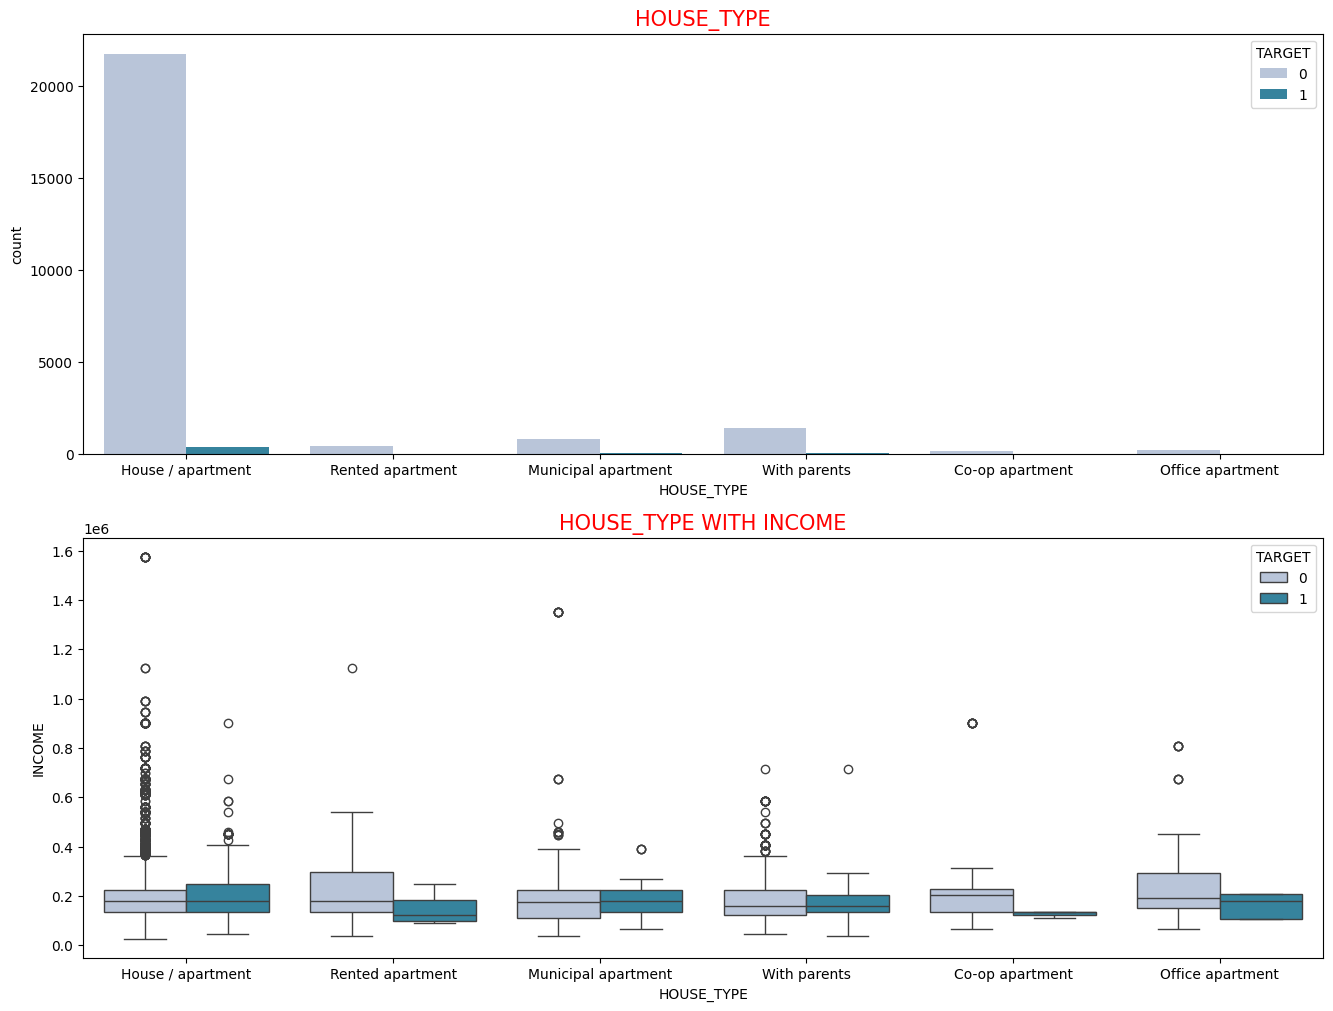

In [583]:
plt.figure(figsize=(16,12))
plt.subplot(211)
plt.title("HOUSE_TYPE", fontsize=15, color="Red")

sns.countplot(data=dataset, x = dataset["HOUSE_TYPE"],hue="TARGET",palette=PALETTE)
plt.subplot(212)
plt.title("HOUSE_TYPE WITH INCOME", fontsize=15, color="Red")
sns.boxplot(data=dataset, x="HOUSE_TYPE",y="INCOME",hue="TARGET",palette=PALETTE)
plt.show()

- Đa số khách hàng ở nhà riêng/chung cư

PHONE, EMAIL, WORK_PHONE, FAMILY SIZE COLUMN

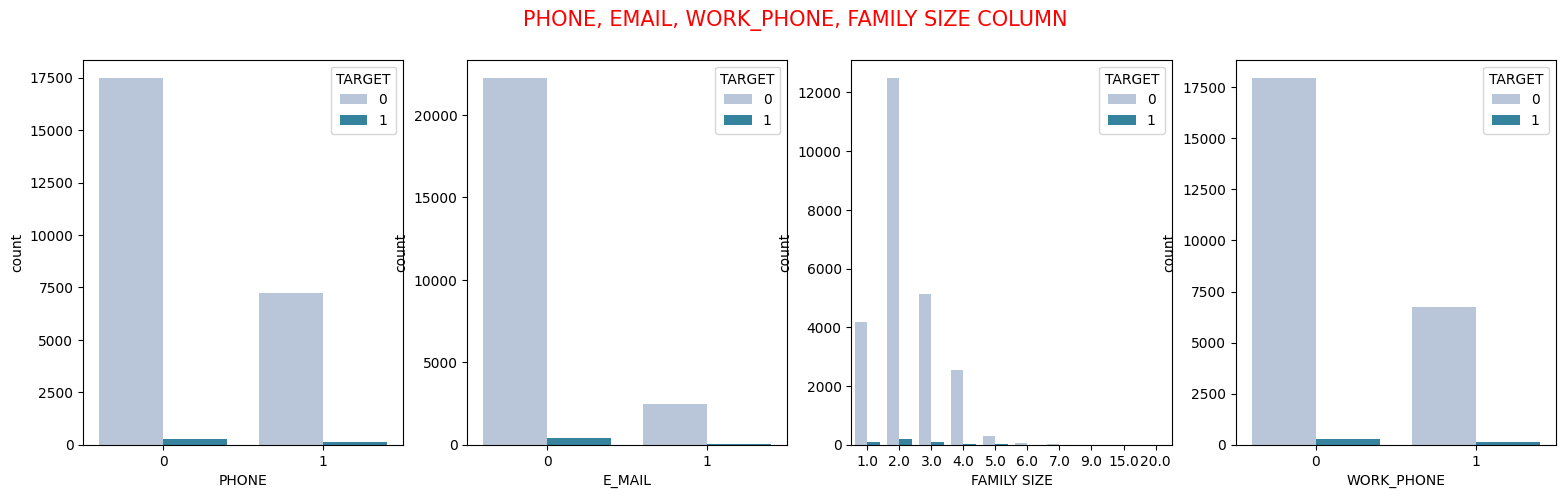

In [584]:
plt.figure(figsize=(19,5))
plt.suptitle("PHONE, EMAIL, WORK_PHONE, FAMILY SIZE COLUMN", fontsize=15, color="Red")

plt.subplot(141)
sns.countplot(data=dataset, x = dataset["PHONE"],hue="TARGET",palette=PALETTE)

plt.subplot(142)
sns.countplot(data=dataset, x = dataset["E_MAIL"],hue="TARGET",palette=PALETTE)
plt.subplot(143)
sns.countplot(data=dataset, x = dataset["FAMILY SIZE"],hue="TARGET",palette=PALETTE)
plt.subplot(144)
sns.countplot(data=dataset, x = dataset["WORK_PHONE"],hue="TARGET",palette=PALETTE)

plt.show()

- Những feature này không liên quan nhiều đến TARGET

BEGIN_MONTH

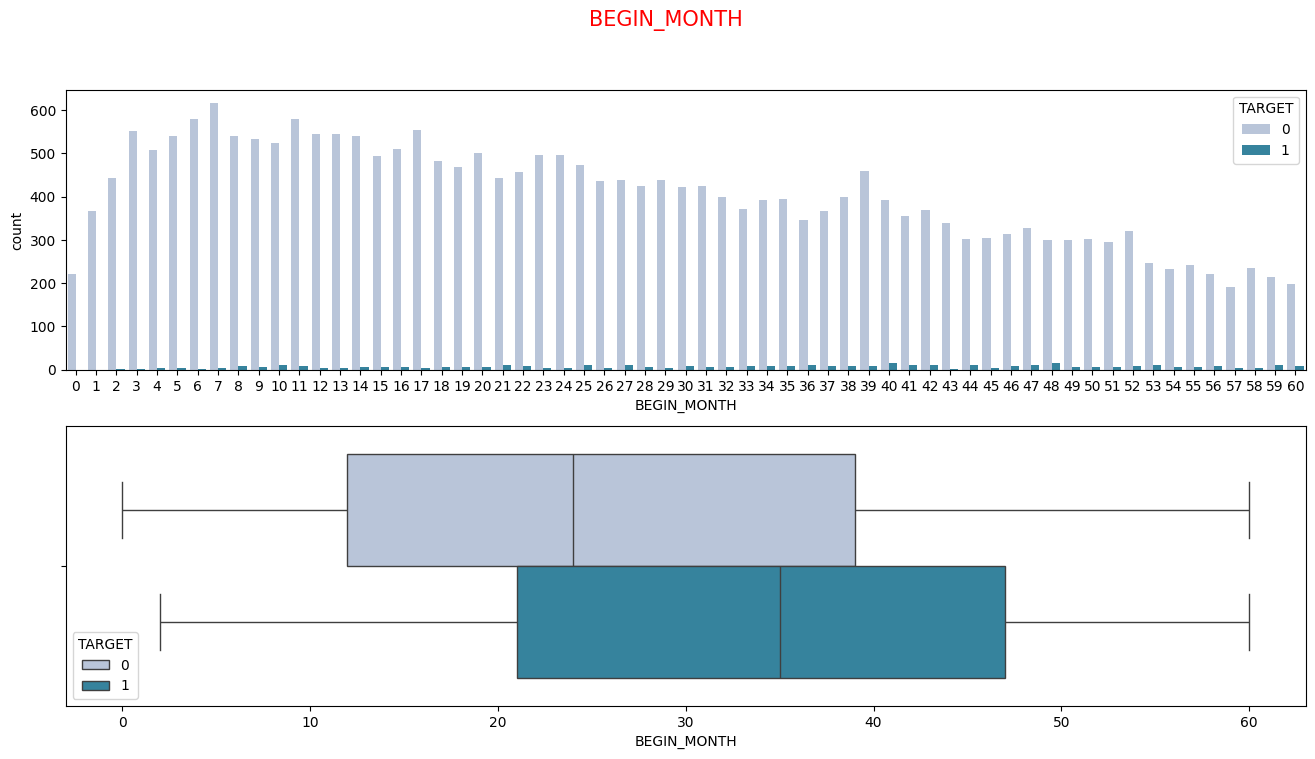

In [585]:
plt.figure(figsize=(16,8))
plt.suptitle("BEGIN_MONTH", fontsize=15, color="Red")
plt.subplot(211)
sns.countplot(data = dataset, x = dataset["BEGIN_MONTH"], hue = "TARGET", palette=PALETTE)
plt.subplot(212)
sns.boxplot(data=dataset, x="BEGIN_MONTH",hue="TARGET",palette=PALETTE)
plt.show()

- Số tháng của khách hàng phân bố khá đồng đều từ 0 đến 60 tháng

AGE

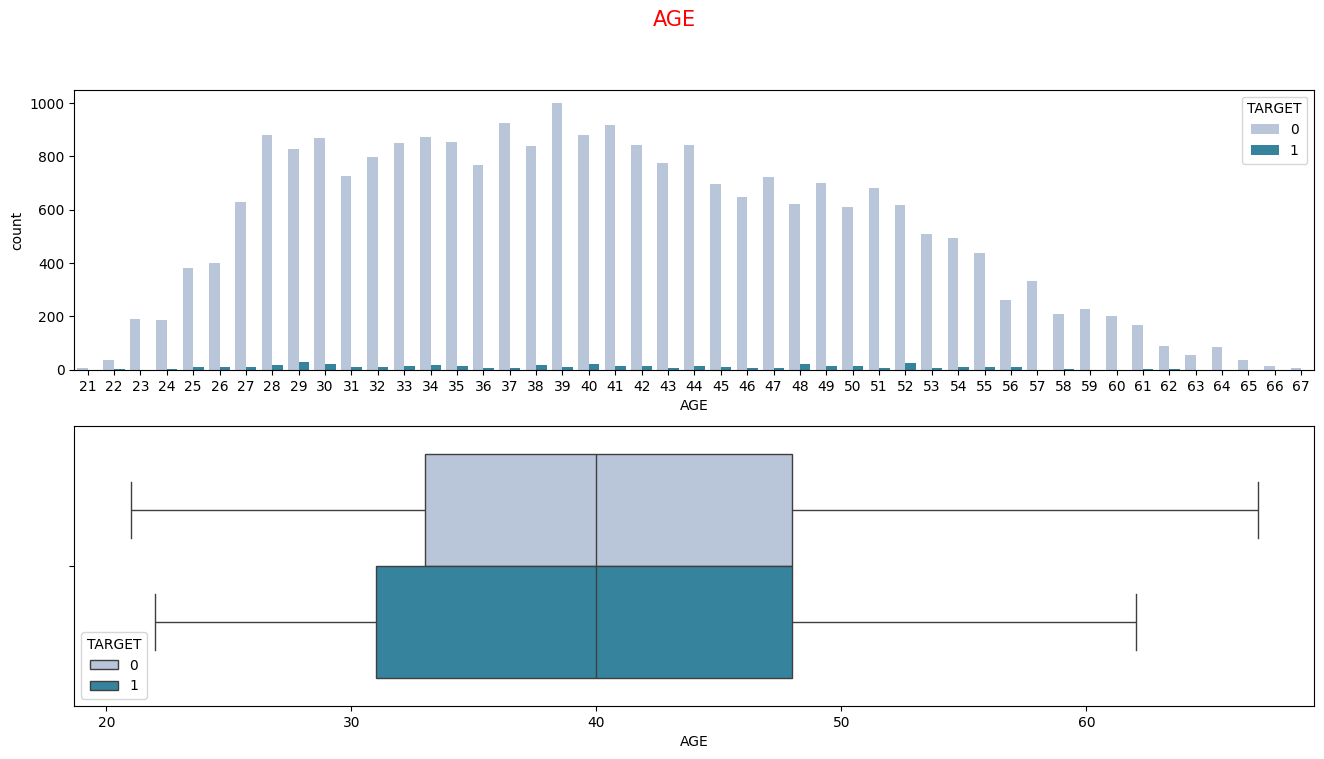

In [586]:

plt.figure(figsize=(16,8))
plt.suptitle("AGE", fontsize=15, color="Red")
plt.subplot(211)
sns.countplot(data = dataset, x = dataset["AGE"], hue = "TARGET", palette= PALETTE)
plt.subplot(212)
sns.boxplot(data=dataset, x="AGE",hue="TARGET",palette=PALETTE)
plt.show()

- Số tháng của khách hàng phân bố khá đồng đều từ 21 đến 67 tuổi (hầu hết ở trong khoảng 30-50)

YEARS_EMPLOYED

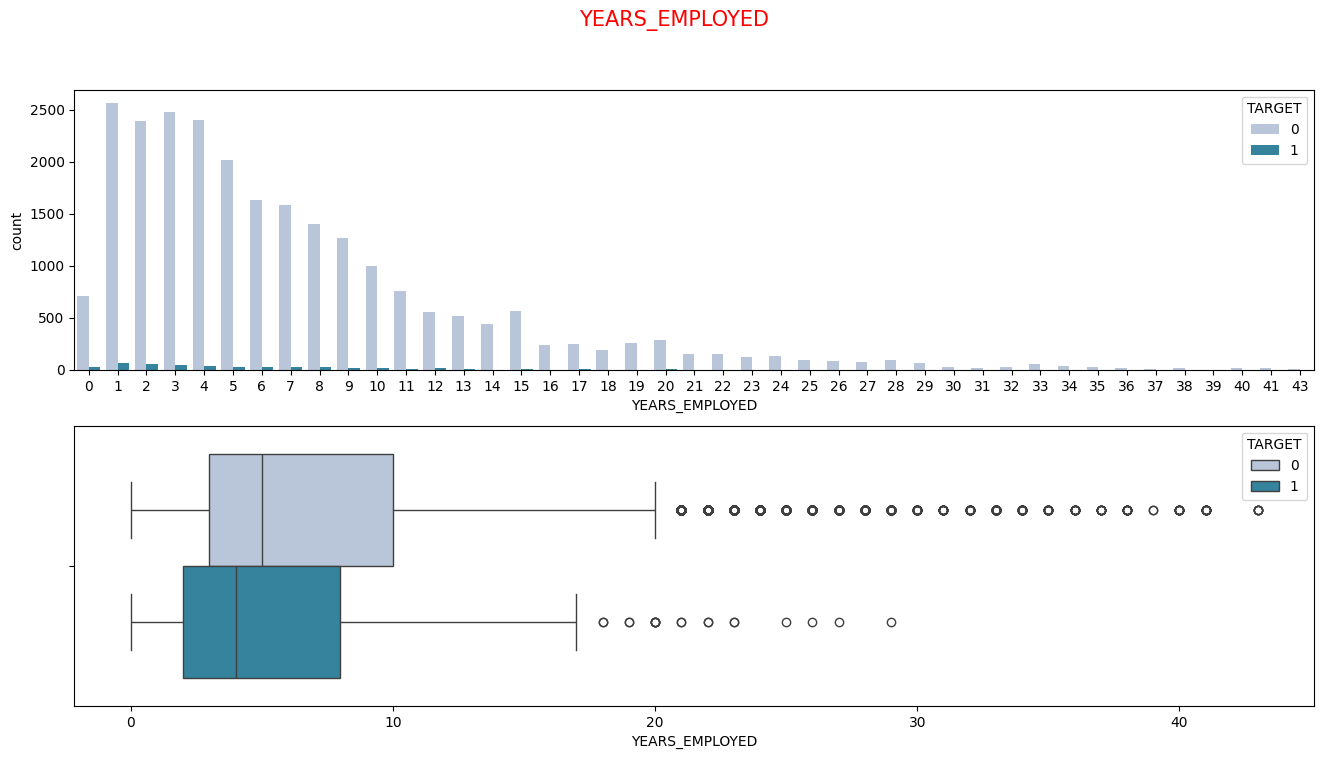

In [587]:

plt.figure(figsize=(16,8))
plt.suptitle("YEARS_EMPLOYED", fontsize=15, color="Red")
plt.subplot(211)
sns.countplot(data = dataset, x = dataset["YEARS_EMPLOYED"], hue = "TARGET", palette=PALETTE)
plt.subplot(212)
sns.boxplot(data=dataset, x="YEARS_EMPLOYED",hue="TARGET",palette=PALETTE)
plt.show()

- Hầu hết khách hàng có kinh nghiệm từ 1 đến 15 năm
- Có một số outliers mà ta phải xử lý sau

## **Preprocessing**

Xử lý outliers

In [588]:
def handle_outliers(df,col,threshold = 1.5):
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1  

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

Tiền xử lý dữ liệu

In [589]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Loại bỏ những cột không cần thiết
    drop_cols = ['Unnamed: 0', 'ID', 'FLAG_MOBIL']
    df.drop(drop_cols, axis=1, inplace=True)
    # Tinh chỉnh ngưỡng outliers muốn loại bỏ
    df = handle_outliers(df,"INCOME",threshold = 4)
    df = handle_outliers(df,"YEARS_EMPLOYED",threshold = 2)


    return df

In [590]:
dataset = preprocessing_data(df.copy())

Kiểm tra lại sau khi sử lý dữ liệu

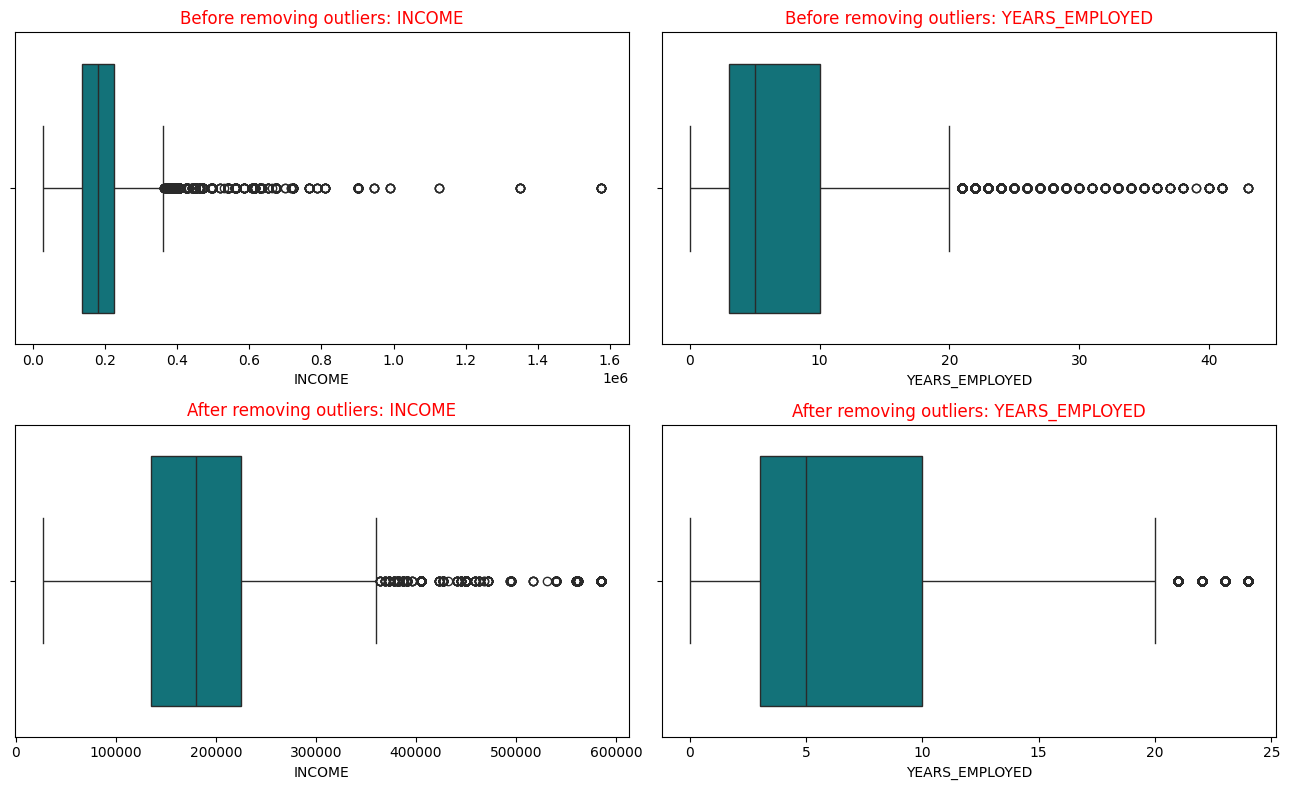

In [592]:
plt.figure(figsize=(13,8))
outliers_cols = ["INCOME","YEARS_EMPLOYED"]

for i, col in enumerate(outliers_cols):
    plt.subplot(2, 2, i + 1)
    plt.title(f"Before removing outliers: {col}", fontsize=12, color = "red")
    sns.boxplot(data=df, x=col, color = COLOR)
    plt.tight_layout()

for i, col in enumerate(outliers_cols):
    plt.subplot(2, 2, i + 3)
    plt.title(f"After removing outliers: {col}", fontsize=12, color = "red")
    sns.boxplot(data=dataset, x=col, color = COLOR)
    plt.tight_layout()

plt.show()

- Không drop hết outliers vì có thể sẽ drop nhầm những giá trị hợp lệ (những người có lương cao hay có nhiều năm kinh nghiệm)

## **Feature Engineering**

Sử dụng `cat.codes` để mã hoá các cột phân loại

In [593]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
    for col in categorical_cols:
        df[col] = df[col].astype("category").cat.codes
    return df

dataset = apply_feature_engineering(dataset.copy())


Correlation matrix

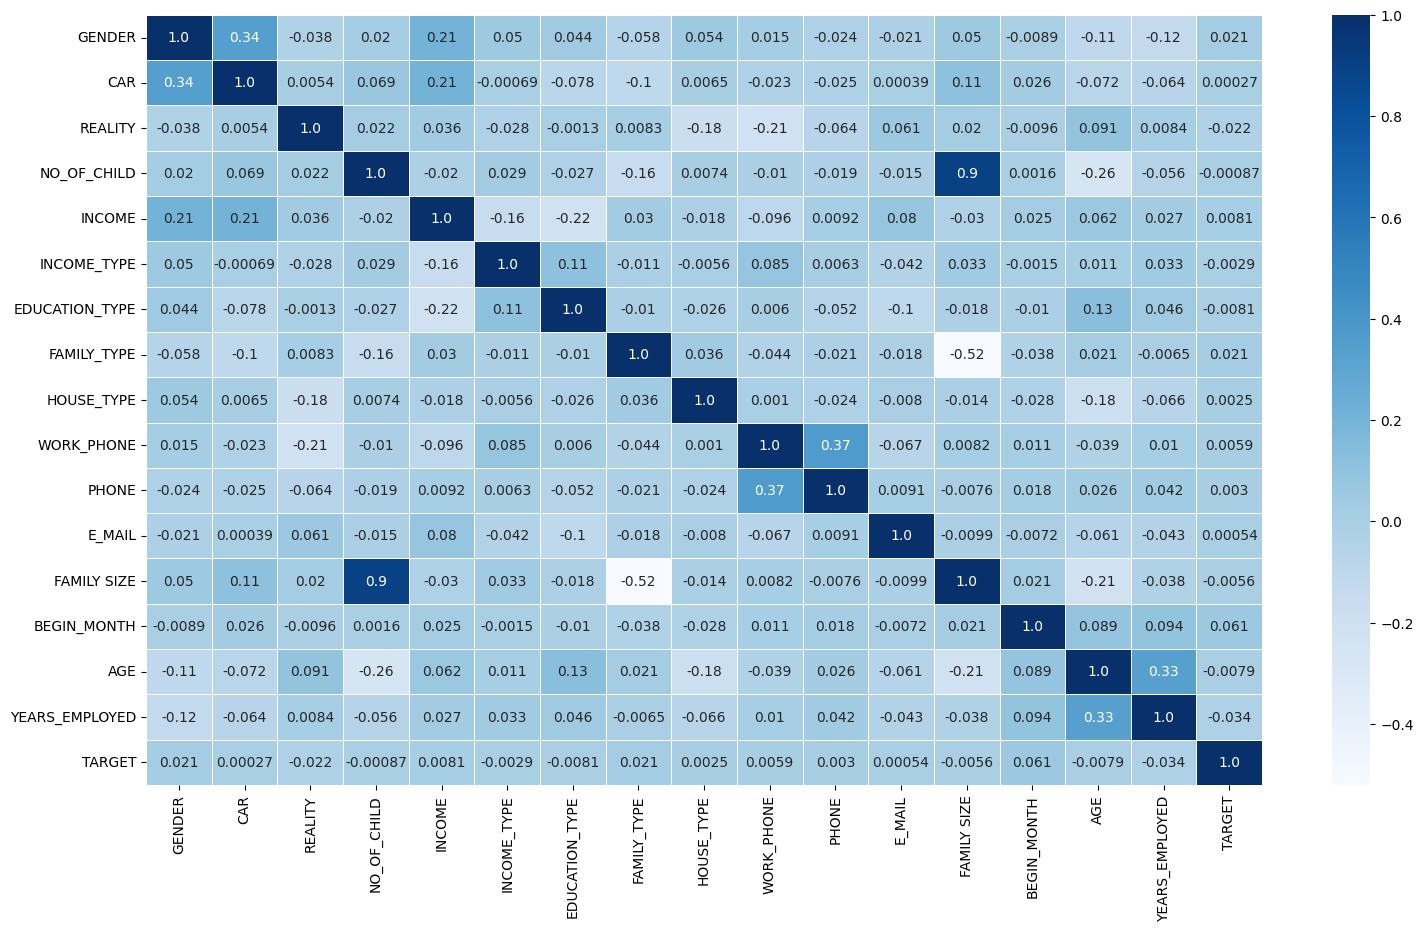

In [594]:
plt.figure(figsize=(18,10))

sns.heatmap(dataset.corr(), cmap="Blues", annot=True, fmt='.2',linewidths=.5)

# Show the plot
plt.show()

- NO_OF_CHILD và FAMILY SIZE tương quan cao với nhau (0.9), chúng đóng vai trò như nhau trong dataset
- Ta sẽ chỉ giữ lại một

Xử lý **imbalance data**

**SMOTE (Synthetic Minority Over-sampling)** phương pháp sinh mẫu nhằm gia tăng kích thước mẫu của nhóm thiểu số trong trường hợp xảy ra mất cân bằng mẫu.

In [595]:
from imblearn.over_sampling import SMOTE
data_oversampled=dataset.copy()
data_oversampled.TARGET.value_counts()

TARGET
0    24712
1      422
Name: count, dtype: int64

In [596]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    #setting TARGET variable SMOTE
    y = df['TARGET'].values
    X = df.drop(['TARGET','NO_OF_CHILD'], axis = 1).values
    X_smote,y_smote=SMOTE().fit_resample(X,y)

    return X_smote, y_smote

X, y = prepare_X_y(data_oversampled)

Kiểm tra lại data sau khi **over-sampling**

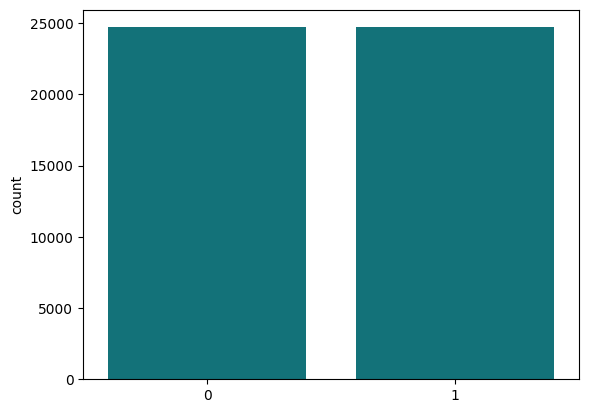

In [597]:
sns.countplot(x=y, color = COLOR)
plt.show()

- Tỷ lệ dữ liệu gian lận - không gian lận đã ngang hàng nhau

# **Apply machine learning model**

## Train-test split

In [599]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 231
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

print(f"X train size:\t {trainX.shape[0]} x {trainX.shape[1]}")
print(f"X test size:\t {testX.shape[0]} x {testX.shape[1]}")
print("y train size:\t",trainY.shape[0])
print("y test size:\t",testY.shape[0])

X train size:	 34596 x 15
X test size:	 14828 x 15
y train size:	 34596
y test size:	 14828


## Build SK-learn model

### Evaluate

In [600]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)

def calculate_performance(y_true, y_pred):
    """
    Calculate performance metrics such as accuracy, precision, recall, F1-score, confusion matrix, and classification report
    :param y_true: Ground truth values
    :param y_pred: Predictions
    :return: main_score
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    # print("Confusion matrix:\n", confusion)
    print("Classification report:\n", report)
  
    # Plot heatmap for confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    main_score = f1
    return main_score

### SVM

In [601]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

def build_model_svm(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    
    # Create a pipeline with StandardScaler and SVC
    pipeline = make_pipeline(
        StandardScaler(),
        SVC()
    )
    # Fit the model with X and y
    pipeline.fit(X, y)

    return pipeline

Accuracy: 0.9532640949554896
Precision: 0.9675135360266556
Recall: 0.9382067851373183
F1-score: 0.9526348164855444
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7400
           1       0.97      0.94      0.95      7428

    accuracy                           0.95     14828
   macro avg       0.95      0.95      0.95     14828
weighted avg       0.95      0.95      0.95     14828



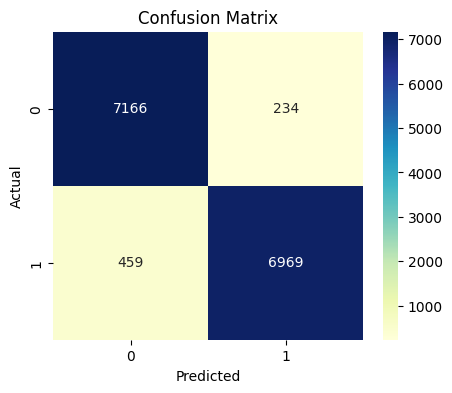

In [602]:
svm_model = build_model_svm(trainX, trainY)
svm_metric = calculate_performance(testY,svm_model.predict(testX))

### MLP 

In [606]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier

def build_model_mlp(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    pipeline = make_pipeline(
        StandardScaler(), 
        MLPClassifier(hidden_layer_sizes=(100,), activation="logistic", learning_rate="adaptive", batch_size=32, max_iter=300)
    )

    pipeline.fit(X, y)

    return pipeline


c:\Users\hnam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9862422444024818
Precision: 0.9782838983050848
Recall: 0.9946149703823371
F1-score: 0.9863818424566088
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7400
           1       0.98      0.99      0.99      7428

    accuracy                           0.99     14828
   macro avg       0.99      0.99      0.99     14828
weighted avg       0.99      0.99      0.99     14828



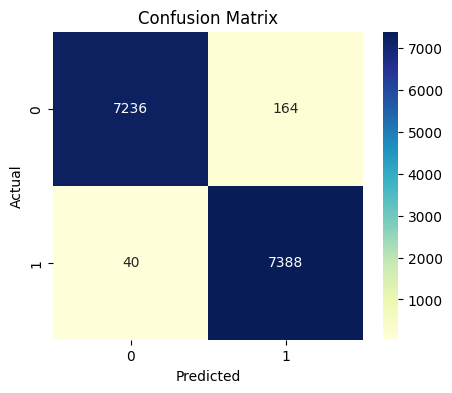

In [607]:
mlp_model = build_model_mlp(trainX, trainY)
mlp_metric = calculate_performance(testY,mlp_model.predict(testX))

### Choose main model

In [628]:
result = pd.DataFrame([svm_metric, mlp_metric])

result = result.rename(index={0: 'SVM', 1: 'MLP'})  
result = result.rename(columns={0:'F1-Score'})  

result = result.round(3)  

result

,F1-Score
SVM,0.953
MLP,0.986


- Cả hai model đều cho kết quả tốt tuy nhiên MLP nhỉnh hơn nên MLP sẽ là model chính

## **Conclusion**

In [630]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return """
    - 6. Em đã chọn metric là F1 vì nó tổng hợp được cả độ chính xác (precision) và độ phủ (recall),
      hai metric quan trọng trong bài toán dự đoán gian lận tín dụng.
      Điều này giúp đảm bảo dự đoán chính xác và không bỏ sót các giao dịch gian lận.

    - Trong bài tập này, em đã xây dựng 2 mô hình SVM và MLP Classifier.
    - MLP cho kết quả thông số tốt hơn (0.99 > 0.95), do đó em chọn MLP làm mô hình chính 
      cho bài toán phân loại gian lận tín dụng.

    - Về các tham số, em không sử dụng các kỹ thuật tuning vì kích thước dataset khá lớn (gần 50k sample), 
      điều này khiến việc chạy thuật toán GridSearchCV mất nhiều thời gian và bộ nhớ 
      (em cũng đã thử một số thuật toán như RandomizeSearchCV, Bayes Optimal nhưng không đem lại hiệu quả)
    - Nếu chỉ chạy trên một mẫu nhỏ thì kết quả sẽ thấp hơn so với các tham số mặc định. 
      Do đó, em quyết định tự điều chỉnh hai mô hình mà không tuning. 
    - Ngoài ra các metric của mô hình đã khá cao (>0.95), nên việc hyperparameter tuning cũng không đem lại thay đổi quá lớn
    """
    
print(get_conclusion())



    - 6. Em đã chọn metric là F1 vì nó tổng hợp được cả độ chính xác (precision) và độ phủ (recall),
      hai metric quan trọng trong bài toán dự đoán gian lận tín dụng.
      Điều này giúp đảm bảo dự đoán chính xác và không bỏ sót các giao dịch gian lận.

    - Trong bài tập này, em đã xây dựng 2 mô hình SVM và MLP Classifier.
    - MLP cho kết quả thông số tốt hơn (0.99 > 0.95), do đó em chọn MLP làm mô hình chính 
      cho bài toán phân loại gian lận tín dụng.

    - Về các tham số, em không sử dụng các kỹ thuật tuning vì kích thước dataset khá lớn (gần 50k sample), 
      điều này khiến việc chạy thuật toán GridSearchCV mất nhiều thời gian và bộ nhớ 
      (em cũng đã thử một số thuật toán như RandomizeSearchCV, Bayes Optimal nhưng không đem lại hiệu quả)
    - Nếu chỉ chạy trên một mẫu nhỏ thì kết quả sẽ thấp hơn so với các tham số mặc định. 
      Do đó, em quyết định tự điều chỉnh hai mô hình mà không tuning. 
    - Ngoài ra các metric của mô hình đã khá cao (>0.95), nên việc